In [25]:
conda install -c jmcmurray json

Solving environment: done

## Package Plan ##

  environment location: /usr/local/anaconda3

  added / updated specs:
    - json


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    json-0.1.1                 |                0           4 KB  jmcmurray
    qutil-3.2.1                |                6          13 KB  jmcmurray
    ------------------------------------------------------------
                                           Total:          18 KB

The following NEW packages will be INSTALLED:

  json               jmcmurray/noarch::json-0.1.1-0 
  qutil              jmcmurray/noarch::qutil-3.2.1-6 



json-0.1.1           | 4 KB      |                                       |   0% 
json-0.1.1           | 4 KB      | ##################################### | 100% 
qutil-3.2.1          | 13 KB     | ##################################### | 100% 
                                          

In [96]:
import json

In [97]:
import pprint

In [5]:
pip install 'git+https://github.com/facebookresearch/detectron2.git@v0.5'

  Cloning https://github.com/facebookresearch/detectron2.git (to revision v0.5) to /private/var/folders/x6/whp9vqq93ml54n__1y6n21600000gn/T/pip-req-build-ca8y7srj
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /private/var/folders/x6/whp9vqq93ml54n__1y6n21600000gn/T/pip-req-build-ca8y7srj
  Running command git checkout -q 82a57ce0b70057685962b352535147d9a8118578
  Resolved https://github.com/facebookresearch/detectron2.git to commit 82a57ce0b70057685962b352535147d9a8118578
  Preparing metadata (setup.py) ... done


Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install pandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 8.2 MB/s eta 0:00:00m eta 0:00:010:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import json

In [7]:
pip install opencv-python

  Using cached opencv_python-4.7.0.68-cp37-abi3-macosx_10_13_x86_64.whl (51.7 MB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
conda install pytorch torchvision torchaudio -c pytorch-nightly

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
import torch
torch.__version__

'2.0.0.dev20230123'

In [4]:
#!pip install pyyaml==5.1
#!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'


  Using cached PyYAML-5.1.tar.gz (274 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for pyyaml: filename=PyYAML-5.1-cp39-cp39-macosx_10_9_x86_64.whl size=44095 sha256=fb87c33531c3af5cd1116070d8cb0aa63c17b4001850366be644fed108d0e419
  Stored in directory: /Users/juliette/Library/Caches/pip/wheels/68/be/8f/b6c454cd264e0b349b47f8ee00755511f277618af9e5dae20d
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask 2022.7.0 requires pyyaml>=5.3.1, but you have pyyaml 5.1 which is incompatible.
conda-repo-cli 1.0.20 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.20 requires nbformat==5.4.0, but you have nbformat 5.5.0 which is incompatible.
co

In [3]:
import torch, torchvision
import matplotlib.pyplot as plt
import json
import cv2
import numpy as np
from copy import deepcopy

In [6]:
from detectron2.modeling import build_model
from detectron2.checkpoint import DetectionCheckpointer
from detectron2.structures.image_list import ImageList
from detectron2.data import transforms as T
from detectron2.modeling.box_regression import Box2BoxTransform
from detectron2.modeling.roi_heads.fast_rcnn import FastRCNNOutputs
from detectron2.structures.boxes import Boxes
from detectron2.layers import nms
from detectron2 import model_zoo
from detectron2.config import get_cfg

In [ ]:
# Load images

In [7]:
df = pd.read_json("/Users/juliette/Desktop/data/train.jsonl", lines=True)

In [8]:
df.head()

,id,img,label,text
0,42953,img/42953.png,0,its their character not their color that matters
1,23058,img/23058.png,0,don't be afraid to love again everyone is not ...
2,13894,img/13894.png,0,putting bows on your pet
3,37408,img/37408.png,0,i love everything and everybody! except for sq...
4,82403,img/82403.png,0,"everybody loves chocolate chip cookies, even h..."


In [49]:
vect_img=df.img
vect_img

0       img/42953.png
1       img/23058.png
2       img/13894.png
3       img/37408.png
4       img/82403.png
            ...      
8495    img/10423.png
8496    img/98203.png
8497    img/36947.png
8498    img/16492.png
8499    img/15937.png
Name: img, Length: 8500, dtype: object

In [50]:
df.img[1]

'img/23058.png'

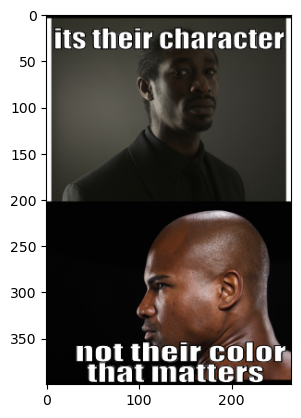

In [54]:
img1 = plt.imread(f'/Users/juliette/Desktop/data/img/42953.png')

# Detectron expects BGR images

img_bgr1 = cv2.cvtColor(img1, cv2.COLOR_RGB2BGR)
plt.imshow(img1)

plt.show()


In [11]:
img1.shape

(400, 265, 3)

# Load and config model 

In [12]:
cfg_path = "COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml"

def load_config_and_model_weights(cfg_path):
    cfg = get_cfg()
    cfg.merge_from_file(model_zoo.get_config_file(cfg_path))

    # ROI HEADS SCORE THRESHOLD
    cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5

    # Comment the next line if you're using 'cuda'
    cfg['MODEL']['DEVICE']='cpu'

    cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(cfg_path)

    return cfg

cfg = load_config_and_model_weights(cfg_path)

# Load the Object Detection Model

In [13]:
def get_model(cfg):
    # build model
    model = build_model(cfg)

    # load weights
    checkpointer = DetectionCheckpointer(model)
    checkpointer.load(cfg.MODEL.WEIGHTS)

    # eval mode
    model.eval()
    return model

model = get_model(cfg)

The checkpoint state_dict contains keys that are not used by the model:
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


# Convert Image to Model Input

In [14]:
def prepare_image_inputs(cfg, img_list):
    # Resizing the image according to the configuration
    transform_gen = T.ResizeShortestEdge(
                [cfg.INPUT.MIN_SIZE_TEST, cfg.INPUT.MIN_SIZE_TEST], cfg.INPUT.MAX_SIZE_TEST
            )
    img_list = [transform_gen.get_transform(img).apply_image(img) for img in img_list]

    # Convert to C,H,W format
    convert_to_tensor = lambda x: torch.Tensor(x.astype("float32").transpose(2, 0, 1))

    batched_inputs = [{"image":convert_to_tensor(img), "height": img.shape[0], "width": img.shape[1]} for img in img_list]

    # Normalizing the image
    num_channels = len(cfg.MODEL.PIXEL_MEAN)
    pixel_mean = torch.Tensor(cfg.MODEL.PIXEL_MEAN).view(num_channels, 1, 1)
    pixel_std = torch.Tensor(cfg.MODEL.PIXEL_STD).view(num_channels, 1, 1)
    normalizer = lambda x: (x - pixel_mean) / pixel_std
    images = [normalizer(x["image"]) for x in batched_inputs]

    # Convert to ImageList
    images =  ImageList.from_tensors(images,model.backbone.size_divisibility)
    
    return images, batched_inputs


In [15]:
images, batched_inputs = prepare_image_inputs(cfg, [img_bgr1])
#Batch c'est le vecteur des images

# Get ResNet+FPN features

In [16]:
def get_features(model, images):
    features = model.backbone(images.tensor)
    return features


In [17]:
features = get_features(model, images)

In [18]:
features

{'p2': tensor([[[[-7.6884e-01,  2.2289e-01,  2.8646e-01,  ...,  2.2229e+00,
             3.2982e+00,  3.7129e+00],
           [-1.8920e+00, -1.4970e+00, -1.7439e+00,  ...,  6.3898e-01,
             1.8191e+00,  3.9280e+00],
           [-1.4282e+00, -1.4981e+00, -2.3036e+00,  ..., -1.8273e-01,
             1.1391e+00,  3.4744e+00],
           ...,
           [ 2.7107e+00,  4.6748e+00,  3.7368e+00,  ...,  6.4809e+00,
             8.3787e+00,  7.1518e+00],
           [-1.1954e+00,  9.6143e-01,  3.5866e-01,  ...,  3.0829e+00,
             3.8203e+00,  5.6512e+00],
           [-2.6680e+00, -3.3200e+00, -3.1951e+00,  ..., -1.1938e+00,
            -1.3392e+00,  1.3153e+00]],
 
          [[-2.1535e+00, -5.3653e-01, -2.1211e-01,  ..., -8.9365e-01,
            -8.1875e-01, -4.0931e-01],
           [-3.2599e+00, -1.1866e+00, -4.5431e-01,  ..., -4.6835e-01,
            -5.6765e-01, -2.3317e-01],
           [-2.9666e+00, -1.3972e+00, -3.2839e-01,  ..., -3.8536e-01,
            -3.9264e-01, -1.6093e

# Visualizing Image and Image features

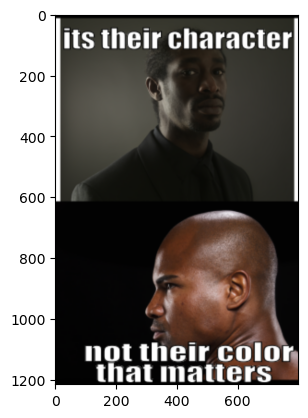

torch.Size([1, 256, 304, 200])


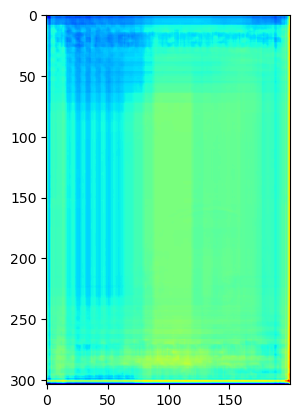

torch.Size([1, 256, 152, 100])


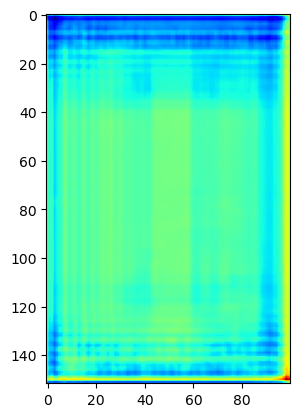

torch.Size([1, 256, 76, 50])


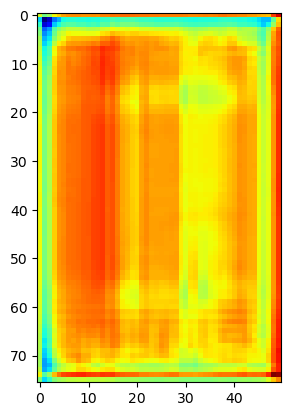

torch.Size([1, 256, 38, 25])


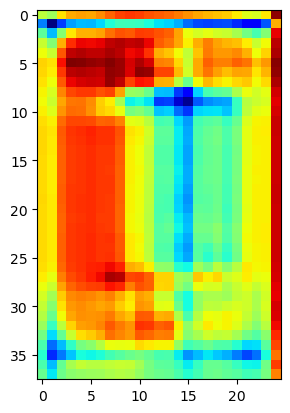

torch.Size([1, 256, 19, 13])


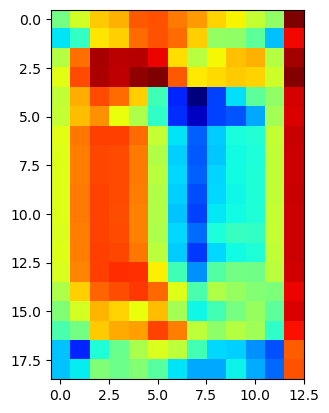

In [22]:
plt.imshow(cv2.resize(img1, (images.tensor.shape[-2:][::-1])))
plt.show()
for key in features.keys():
    print(features[key].shape)
    plt.imshow(features[key][0,0,:,:].squeeze().detach().numpy(), cmap='jet')
    plt.show()

# Get region proposals from RPN

In [23]:
def get_proposals(model, images, features):
    proposals, _ = model.proposal_generator(images, features)
    return proposals

proposals = get_proposals(model, images, features)

/usr/local/anaconda3/lib/python3.9/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1674461338898/work/aten/src/ATen/native/TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


# Get box features


In [29]:
def get_box_features(model, features, proposals):
    features_list = [features[f] for f in ['p2', 'p3', 'p4', 'p5']]
    box_features = model.roi_heads.box_pooler(features_list, [x.proposal_boxes for x in proposals])
    box_features = model.roi_heads.box_head.flatten(box_features)
    box_features = model.roi_heads.box_head.fc1(box_features)
    box_features = model.roi_heads.box_head.fc_relu1(box_features)
    box_features = model.roi_heads.box_head.fc2(box_features)

    box_features = box_features.reshape(1,1000,1024) # depends on your config and batch size
    return box_features, features_list

In [30]:
box_features, features_list = get_box_features(model, features, proposals)

# Get prediction logits and boxes

In [31]:
def get_prediction_logits(model, features_list, proposals):
    cls_features = model.roi_heads.box_pooler(features_list, [x.proposal_boxes for x in proposals])
    cls_features = model.roi_heads.box_head(cls_features)
    pred_class_logits, pred_proposal_deltas = model.roi_heads.box_predictor(cls_features)
    return pred_class_logits, pred_proposal_deltas

pred_class_logits, pred_proposal_deltas = get_prediction_logits(model, features_list, proposals)

# Get FastRCNN scores and boxes

In [32]:
def get_box_scores(cfg, pred_class_logits, pred_proposal_deltas):
    box2box_transform = Box2BoxTransform(weights=cfg.MODEL.ROI_BOX_HEAD.BBOX_REG_WEIGHTS)
    smooth_l1_beta = cfg.MODEL.ROI_BOX_HEAD.SMOOTH_L1_BETA

    outputs = FastRCNNOutputs(
        box2box_transform,
        pred_class_logits,
        pred_proposal_deltas,
        proposals,
        smooth_l1_beta,
    )

    boxes = outputs.predict_boxes()
    scores = outputs.predict_probs()
    image_shapes = outputs.image_shapes

    return boxes, scores, image_shapes

boxes, scores, image_shapes = get_box_scores(cfg, pred_class_logits, pred_proposal_deltas)

# Rescale the boxes to original image size

In [33]:
def get_output_boxes(boxes, batched_inputs, image_size):
    proposal_boxes = boxes.reshape(-1, 4).clone()
    scale_x, scale_y = (batched_inputs["width"] / image_size[1], batched_inputs["height"] / image_size[0])
    output_boxes = Boxes(proposal_boxes)

    output_boxes.scale(scale_x, scale_y)
    output_boxes.clip(image_size)

    return output_boxes

output_boxes = [get_output_boxes(boxes[i], batched_inputs[i], proposals[i].image_size) for i in range(len(proposals))]

# Select the Boxes using NMS

In [34]:
def select_boxes(cfg, output_boxes, scores):
    test_score_thresh = cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST
    test_nms_thresh = cfg.MODEL.ROI_HEADS.NMS_THRESH_TEST
    cls_prob = scores.detach()
    cls_boxes = output_boxes.tensor.detach().reshape(1000,80,4)
    max_conf = torch.zeros((cls_boxes.shape[0]))
    for cls_ind in range(0, cls_prob.shape[1]-1):
        cls_scores = cls_prob[:, cls_ind+1]
        det_boxes = cls_boxes[:,cls_ind,:]
        keep = np.array(nms(det_boxes, cls_scores, test_nms_thresh))
        max_conf[keep] = torch.where(cls_scores[keep] > max_conf[keep], cls_scores[keep], max_conf[keep])
    keep_boxes = torch.where(max_conf >= test_score_thresh)[0]
    return keep_boxes, max_conf

In [36]:
temp = [select_boxes(cfg, output_boxes[i], scores[i]) for i in range(len(scores))]
keep_boxes, max_conf = [],[]
for keep_box, mx_conf in temp:
    keep_boxes.append(keep_box)
    max_conf.append(mx_conf)

# Limit the total number of boxes

In [37]:
MIN_BOXES=10
MAX_BOXES=100
def filter_boxes(keep_boxes, max_conf, min_boxes, max_boxes):
    if len(keep_boxes) < min_boxes:
        keep_boxes = np.argsort(max_conf).numpy()[::-1][:min_boxes]
    elif len(keep_boxes) > max_boxes:
        keep_boxes = np.argsort(max_conf).numpy()[::-1][:max_boxes]
    return keep_boxes

keep_boxes = [filter_boxes(keep_box, mx_conf, MIN_BOXES, MAX_BOXES) for keep_box, mx_conf in zip(keep_boxes, max_conf)]

# Get the visual embeddings :

In [38]:
def get_visual_embeds(box_features, keep_boxes):
    return box_features[keep_boxes.copy()]

visual_embeds = [get_visual_embeds(box_feature, keep_box) for box_feature, keep_box in zip(box_features, keep_boxes)]

In [39]:
visual_embeds

[tensor([[-1.4539, -1.3412,  0.4523,  ..., -1.0006,  0.6929,  0.3356],
         [-1.5688, -1.3123,  0.4549,  ..., -1.0242,  0.7627,  0.3308],
         [ 0.1562, -1.5792, -0.5728,  ..., -1.7358,  0.5195,  0.6768],
         ...,
         [ 0.9316, -0.6550,  1.0521,  ..., -0.4215,  0.1838,  1.2676],
         [ 1.2246, -1.0133,  0.6044,  ..., -0.4660,  0.0166,  0.8933],
         [ 1.2228, -1.0038,  0.6112,  ..., -0.4675,  0.0182,  0.8907]],
        grad_fn=<IndexBackward0>)]

# Generalisation

In [69]:
def concatenation_visual_embeded(img1): 
    img_bgr1 = cv2.cvtColor(img1, cv2.COLOR_RGB2BGR)
    images, batched_inputs = prepare_image_inputs(cfg, [img_bgr1])
    features = get_features(model, images)
    proposals = get_proposals(model, images, features)
    box_features, features_list = get_box_features(model, features, proposals)
    pred_class_logits, pred_proposal_deltas = get_prediction_logits(model, features_list, proposals)
    boxes, scores, image_shapes = get_box_scores(cfg, pred_class_logits, pred_proposal_deltas)
    output_boxes = [get_output_boxes(boxes[i], batched_inputs[i], proposals[i].image_size) for i in range(len(proposals))]
    temp = [select_boxes(cfg, output_boxes[i], scores[i]) for i in range(len(scores))]

    keep_boxes, max_conf = [],[]
    for keep_box, mx_conf in temp:
        keep_boxes.append(keep_box)
        max_conf.append(mx_conf)
        
    keep_boxes = [filter_boxes(keep_box, mx_conf, MIN_BOXES, MAX_BOXES) for keep_box, mx_conf in zip(keep_boxes, max_conf)]
    
    visual_embeds = [get_visual_embeds(box_feature, keep_box) for box_feature, keep_box in zip(box_features, keep_boxes)]
    
    return visual_embeds

In [72]:
a = concatenation_visual_embeded(img1)

In [73]:
a

[tensor([[-1.4539, -1.3412,  0.4523,  ..., -1.0006,  0.6929,  0.3356],
         [-1.5688, -1.3123,  0.4549,  ..., -1.0242,  0.7627,  0.3308],
         [ 0.1562, -1.5792, -0.5728,  ..., -1.7358,  0.5195,  0.6768],
         ...,
         [ 0.9316, -0.6550,  1.0521,  ..., -0.4215,  0.1838,  1.2676],
         [ 1.2246, -1.0133,  0.6044,  ..., -0.4660,  0.0166,  0.8933],
         [ 1.2228, -1.0038,  0.6112,  ..., -0.4675,  0.0182,  0.8907]],
        grad_fn=<IndexBackward0>)]

In [91]:
image_name_vector=[]
for i in range(len(df.img)):
    y=df.img[i]
    image_name_vector.append(y)
print(image_name_vector)

['img/42953.png', 'img/23058.png', 'img/13894.png', 'img/37408.png', 'img/82403.png', 'img/16952.png', 'img/76932.png', 'img/70914.png', 'img/02973.png', 'img/58306.png', 'img/79351.png', 'img/34096.png', 'img/25489.png', 'img/19324.png', 'img/79346.png', 'img/13426.png', 'img/97628.png', 'img/14238.png', 'img/28936.png', 'img/59784.png', 'img/02146.png', 'img/70146.png', 'img/28061.png', 'img/97180.png', 'img/49752.png', 'img/25610.png', 'img/15872.png', 'img/72640.png', 'img/64318.png', 'img/17956.png', 'img/93547.png', 'img/10743.png', 'img/37091.png', 'img/25719.png', 'img/76825.png', 'img/72598.png', 'img/43078.png', 'img/51846.png', 'img/01569.png', 'img/95812.png', 'img/06418.png', 'img/53976.png', 'img/70193.png', 'img/60427.png', 'img/78395.png', 'img/04876.png', 'img/92075.png', 'img/86354.png', 'img/74386.png', 'img/59613.png', 'img/10263.png', 'img/48279.png', 'img/52610.png', 'img/58371.png', 'img/27401.png', 'img/89574.png', 'img/25473.png', 'img/47913.png', 'img/08295.pn

In [94]:
vect_tensor_bis = []
for i in range(5): 
    img = plt.imread(f'/Users/juliette/Desktop/data/' + str(image_name_vector[i]) )
    tens = concatenation_visual_embeded(img)
    vect_tensor_bis.append(tens)

print(vect_tensor_bis)

[[tensor([[-1.4539, -1.3412,  0.4523,  ..., -1.0006,  0.6929,  0.3356],
        [-1.5688, -1.3123,  0.4549,  ..., -1.0242,  0.7627,  0.3308],
        [ 0.1562, -1.5792, -0.5728,  ..., -1.7358,  0.5195,  0.6768],
        ...,
        [ 0.9316, -0.6550,  1.0521,  ..., -0.4215,  0.1838,  1.2676],
        [ 1.2246, -1.0133,  0.6044,  ..., -0.4660,  0.0166,  0.8933],
        [ 1.2228, -1.0038,  0.6112,  ..., -0.4675,  0.0182,  0.8907]],
       grad_fn=<IndexBackward0>)], [tensor([[ 0.6276, -1.2941, -0.3773,  ..., -2.3469,  0.7550,  0.2583],
        [-1.5682, -0.9610,  0.1976,  ..., -1.5610, -0.6263,  0.7240],
        [-1.4788, -1.2394,  0.3772,  ..., -1.3984,  0.1076,  0.1839],
        ...,
        [ 0.0578, -0.7057, -0.3137,  ..., -1.0938, -0.0751,  0.4022],
        [-0.3942, -1.0368, -0.0819,  ..., -0.7561,  0.3378,  0.2679],
        [ 0.0771, -0.7113, -0.2979,  ..., -1.1066, -0.0453,  0.4013]],
       grad_fn=<IndexBackward0>)], [tensor([[ 0.3808, -1.5743, -0.5248,  ..., -1.7985,  0.2745

In [95]:
len(vect_tensor_bis)

5

In [101]:
with open("/Users/juliette/statsapp/tens.json","w") as json_file:
    data=json.load(json_file)
    print(type(data))
    pprint.pprint(data)
   


UnsupportedOperation: not readable

# Entrainement du model 